This notebook is abut implementing **KNN** algorithm on classification2 dataset

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

In [2]:
dataset = pd.read_csv('E:/Jupyterfiles/ML_practice/classification_2.csv')
dataset.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thatach,exang,oldpeak,slope,ca,thal,diag
0,63,male,angina,145,233,TRUE,hyp,150,fal,2.3,down,0,fix,buff
1,67,male,asympt,160,286,fal,hyp,108,TRUE,1.5,flat,3,norm,sick
2,67,male,asympt,120,229,fal,hyp,129,TRUE,2.6,flat,2,rev,sick
3,37,male,notang,130,250,fal,norm,187,fal,3.5,down,0,norm,buff
4,41,fem,abnang,130,204,fal,hyp,172,fal,1.4,up,0,norm,buff


In [3]:
X = dataset.iloc[:, 3:5].values
y = dataset.iloc[:, -1].values

In [4]:
# split into train and test data in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Normalize train and test data
sc = Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn_classifier.predict(X_test)

# Model evaluation

In [8]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precison score: ', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall score: ', recall_score(y_test, y_pred, average = 'weighted'))
print('f1 score: ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy score:  0.4594594594594595
Precison score:  0.46848826848826847
Recall score:  0.4594594594594595
f1 score:  0.4626555602165359


In [9]:
# for confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[21 22]
 [18 13]]


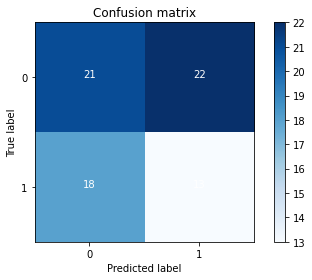

In [10]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0, 1])
plt.show()